<a href="https://colab.research.google.com/github/CaptainLento/Optimization/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modena Housing Price** (Optimization Project)
This Optimization project is a Multivariate linear regression implemented through solving an optimization problem using the gradient descent method and some of its variants. \
The Dataset I will use is a House Price study in the city of Modena, Italy. The idea is to perform a linear regression using the price as the dependent variable and the number of bedrooms, number of bathrooms, and the size of the house as independent variables. Dataset is aveliable on Kaggle.com at the link: [https://www.kaggle.com/datasets/albertostefani/modena-housing-price](https://)




In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset form Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('MyDrive/Optimization/Modena-House.csv')

# Import Dataset form environment
df = pd.read_csv('Modena-House.csv')
# Tolgo colonne non interessanti per la mia ricerca
df_filtered = df[["m2","bathrooms","bedrooms", "year", "price"]]

# Data cleaning
Initial point of the analysis is to:
*   Identify the variables (possibly continuos) we are intresteed in: m2, bathrooms, bedrooms, year, price. The least one is our output variable.
*   Starting cleaning the data dropping out rows with missing valuse.
*   Calculate the IQR for the variables and cut off the valuse not in the outliers
*   Print a scatch of our data that now are clean and ready to be studied




In [17]:
# Filtro Outliers con IQR
vars = ["m2","bathrooms","bedrooms", "year", "price"]
# Filtra i valori anomali utilizzando il concetto di IQR
for var in vars:
    # Convert the column to numeric, handling non-numeric values
    df_filtered[var] = pd.to_numeric(df_filtered[var], errors='coerce')
    # Drop rows with missing values
    df_filtered = df_filtered.dropna(subset=[var])
    # Calculate the IQR for the variable
    Q1 = df_filtered[var].quantile(0.25)
    Q3 = df_filtered[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[var] >= lower_limit) & (df_filtered[var] <= upper_limit)]

# Print the cleaned data
print(df_filtered.head())

      m2  bathrooms  bedrooms    year  price
0   68.0        1.0       1.0  1970.0   82.0
1   92.0        1.0       2.0  1971.0   85.0
2   80.0        1.0       2.0  2007.0  133.0
3  110.0        1.0       2.0  1965.0  145.0
4   75.0        1.0       2.0  1998.0  128.0



# Regression Model
With the features we have, we want to compute the best model to use gradient descent in the form of Regressison betwwen all the possible combinations between features and the Price variable. \
After a short analysis we can see that the best model for our scope is that has Bedrooms and Bathroom as regressors (analysis based on the best cond_number result).



```
features = df_filtered[['bathrooms','bedrooms']]
prices = df_filtered['price']
A, b = build_model_data(standardize(features), standardize(prices))
```






In [38]:
def standardize(x):
    """Standardize the original data points (mean 0 and std dev 1)."""
    x = x - np.mean(x)
    x = x / np.std(x)
    return x

def build_model_data(x, y):
    """Get regression data in matrix form."""
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), x]
    return A, b

In [40]:
features = df_filtered[['bathrooms','bedrooms']]
prices = df_filtered['price']

# Building our Model
A, b = build_model_data(standardize(features), standardize(prices))
A = np.array(A)
b = np.array(b)

# cond_number to evaluate the quality of our model
cond_number = np.linalg.cond(A)
print("Numero di condizionamento di A:", cond_number)
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Numero di condizionamento di A: 3.061952142095987
Number of samples n =  2784
Dimension of each sample d =  3


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


# Gradient descendent method functions
Here we start analyize the simple Gradient descent method to see in how many iterations the algorithm start getting a good result \
As we can see in the following code, we can notice that, for the classic gradient descent method, the number of steps we need to get a good result is almost 10.

In [60]:
def calculate_objective(Axmb):
    """Calculate ||Ax - b||^2 for the vector Axmb = Ax - b"""
    obj = (Axmb**2).sum()
    return obj

def compute_gradient(A, x, b):
    """Compute the gradient and objective function."""
    Axmb = A.dot(x) - b
    grad = 2 * A.T.dot(Axmb)
    return grad, Axmb

def gradient_descent(A, initial_x, b, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute objective and gradient
        grad, Axmb = compute_gradient(A, x, b)
        obj = calculate_objective(Axmb)
        x = x - gamma * grad

        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l:.5f}, x=[{w0:.5f},{w1:.5f},{w2:.5f}]".format(
              bi=n_iter, ti=max_iters - 1, l=obj, w0=x[0], w1=x[1], w2=x[2] ))
    return objectives, xs

In [61]:
max_iters = 50
gamma = 0.0001 # Tasso di apprendimento iniziale
x_initial = np.zeros(A.shape[1])
gradient_objectives_naive, gradient_xs_naive = gradient_descent(A, x_initial, b, max_iters, gamma)

Gradient Descent(0/49): objective=2784.00000, x=[-0.00000,0.33750,0.26758]
Gradient Descent(1/49): objective=1726.35157, x=[0.04989,0.37411,0.31867]
Gradient Descent(2/49): objective=1686.14731, x=[0.07025,0.39722,0.31357]
Gradient Descent(3/49): objective=1677.62517, x=[0.09030,0.40915,0.30452]
Gradient Descent(4/49): objective=1671.78095, x=[0.10697,0.41949,0.29512]
Gradient Descent(5/49): objective=1667.35165, x=[0.12161,0.42824,0.28680]
Gradient Descent(6/49): objective=1663.98099, x=[0.13435,0.43589,0.27951]
Gradient Descent(7/49): objective=1661.41552, x=[0.14547,0.44254,0.27314]
Gradient Descent(8/49): objective=1659.46290, x=[0.15517,0.44835,0.26758]
Gradient Descent(9/49): objective=1657.97671, x=[0.16363,0.45342,0.26273]
Gradient Descent(10/49): objective=1656.84555, x=[0.17101,0.45784,0.25850]
Gradient Descent(11/49): objective=1655.98460, x=[0.17745,0.46170,0.25480]
Gradient Descent(12/49): objective=1655.32931, x=[0.18307,0.46507,0.25158]
Gradient Descent(13/49): objective

# Smoothness gradient descent with L parameter
To be able to use smothness for this algorithm we have first of all calcolate the L parameter for witch the function results smooth (calcolate_L function) \
After that we can easily change our generic gamma with the new gammasmooth that we just found; we can notice, looking at the results we get that, our algorithm has a different result but stabilize itself more or less at the 10th iteration.

In [53]:
def calculate_L(A, b):
    """Calculate the smoothness constant for f"""
    L = 2 * np.linalg.norm(A.T.dot(A), ord=2)
    return L

In [57]:
max_iters = 50
gamma_smooth = (1/calculate_L(A,b))
print(gamma_smooth)
x_initial = np.zeros(A.shape[1])
gradient_objectives_smooth, gradient_xs_smooth = gradient_descent(A, x_initial, b, max_iters, gamma_smooth)

8.360406327469688e-05
Gradient Descent(0/49): objective=2784.00000, x=[-0.00000,0.28216,0.22371]
Gradient Descent(1/49): objective=1790.45812, x=[0.03487,0.35401,0.29609]
Gradient Descent(2/49): objective=1697.05318, x=[0.05820,0.38350,0.31084]
Gradient Descent(3/49): objective=1682.11892, x=[0.07666,0.39928,0.30882]
Gradient Descent(4/49): objective=1675.72333, x=[0.09243,0.41015,0.30239]
Gradient Descent(5/49): objective=1671.13098, x=[0.10629,0.41889,0.29524]
Gradient Descent(6/49): objective=1667.51345, x=[0.11861,0.42640,0.28842]
Gradient Descent(7/49): objective=1664.63085, x=[0.12959,0.43302,0.28220]
Gradient Descent(8/49): objective=1662.33078, x=[0.13940,0.43891,0.27660]
Gradient Descent(9/49): objective=1660.49523, x=[0.14816,0.44415,0.27159]
Gradient Descent(10/49): objective=1659.03037, x=[0.15598,0.44884,0.26711]
Gradient Descent(11/49): objective=1657.86132, x=[0.16297,0.45303,0.26311]
Gradient Descent(12/49): objective=1656.92836, x=[0.16921,0.45676,0.25953]
Gradient Des

# Lipshits bounded Gradient descent
Last but not least principal method was to try Lipshits bounded Gradient descent so, after calculate the bound and is own gamma i verify in how long the gradient will find an optimal value \
The result was a little worst than before but we can see it of the following graph.

In [58]:
max_iters = 50
R = 25
B = 2 * (R*np.linalg.norm(np.dot(A.T,A)) + np.linalg.norm(np.dot(A.T,b)))
gamma_bounded = R/(B*np.sqrt(max_iters))
gradient_objectives_bounded, gradient_xs_bounded = gradient_descent(A, x_initial, b, max_iters, gamma_bounded)

Gradient Descent(0/49): objective=2784.00000, x=[-0.00000,0.03225,0.02557]
Gradient Descent(1/49): objective=2614.00461, x=[0.00046,0.06176,0.04917]
Gradient Descent(2/49): objective=2470.74909, x=[0.00130,0.08877,0.07092]
Gradient Descent(3/49): objective=2349.94895, x=[0.00247,0.11350,0.09097]
Gradient Descent(4/49): objective=2248.01809, x=[0.00391,0.13618,0.10944]
Gradient Descent(5/49): objective=2161.95268, x=[0.00558,0.15697,0.12644]
Gradient Descent(6/49): objective=2089.23473, x=[0.00744,0.17606,0.14207]
Gradient Descent(7/49): objective=2027.75203, x=[0.00945,0.19359,0.15644]
Gradient Descent(8/49): objective=1975.73158, x=[0.01159,0.20970,0.16964]
Gradient Descent(9/49): objective=1931.68419, x=[0.01383,0.22452,0.18176]
Gradient Descent(10/49): objective=1894.35832, x=[0.01615,0.23816,0.19287]
Gradient Descent(11/49): objective=1862.70153, x=[0.01853,0.25073,0.20305]
Gradient Descent(12/49): objective=1835.82837, x=[0.02096,0.26232,0.21237]
Gradient Descent(13/49): objective

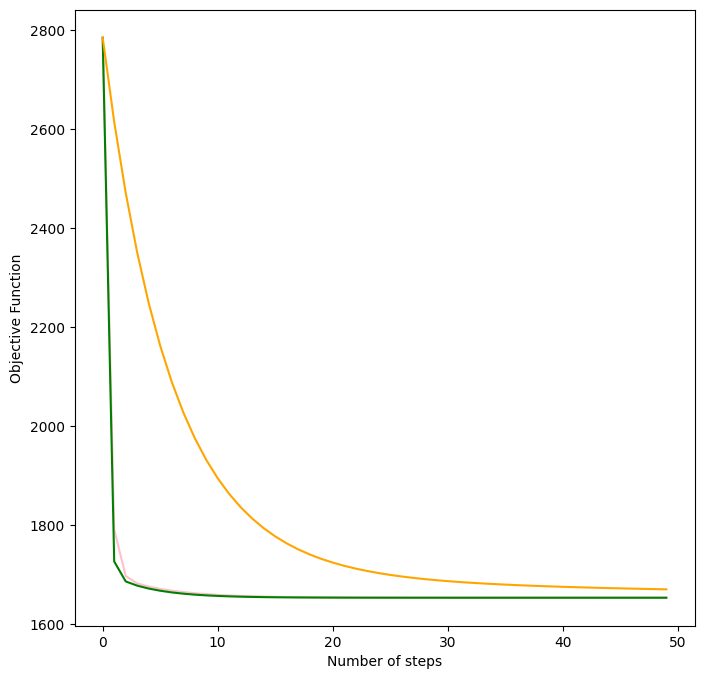

In [62]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
plt.plot(range(len(gradient_objectives_smooth)), gradient_objectives_smooth,'pink', label='gradient descent assuming smoothness')
plt.plot(range(len(gradient_objectives_naive)), gradient_objectives_naive,'green', label='naive gradient descent')
plt.plot(range(len(gradient_objectives_bounded)), gradient_objectives_bounded,'orange', label='gradient_objectives_bounded')